# Multiconilearity


Multicollinearity occurs when predictor variables in a regression model are highly correlated, making it difficult to distinguish their individual effects. In regression analysis, multicollinearity complicates coefficient estimation and interpretation because it can dim unique contribution of each predictor variable.

## Examples:

- Temperature and humidity correlate; predicting rain probability with both of these two can lead to conilearity.
- Gender and income can correlate, leading to conilearity in specific regressions.


## Finding inverse of a matrix with linear combination column in Julia


In [36]:
# Enteros aleatorios
matriz = rand(0:99, 10, 9)

# Combinacion lineal
suma_columnas = matriz[:, 2] .- 2 .* matriz[:, 6] .+ 3 .* matriz[:, 8]

# Concatenar la combinación a la matriz
matriz = hcat(matriz, suma_columnas)
println("La matriz es: ")
println(matriz)
println("\n")

# Calcular la inversa de la matriz
inversa = inv(matriz)

println("La matriz inversa es: ")
println(inversa)


La matriz es: 
[87 52 18 37 49 24 40 37 88 115; 80 20 83 27 25 84 44 46 24 -10; 39 13 64 31 37 38 83 95 35 222; 68 55 29 51 25 54 56 28 2 31; 52 89 33 96 76 91 70 88 42 171; 79 65 39 20 59 46 87 53 89 132; 11 84 28 72 94 92 7 90 98 170; 44 3 9 75 30 16 26 98 69 265; 61 4 94 87 27 68 18 63 49 57; 93 92 73 93 22 17 40 64 8 250]


La matriz inversa es: 
[0.03465038088370841 -0.012425574350848591 0.0321578632073681 0.06301548206329956 -0.045045939491216574 -0.03979427584426716 0.02269346189483792 -0.007208573561321482 -0.004776408771419206 -0.007684945140372077; 7.200286116504043e12 -1.744667767582121e13 1.965006024326267e13 4.732705365526901e13 -3.518437208883193e13 -1.382312182977053e13 1.94775454642281e13 -4.292088683580006e12 2.868209342983117e12 -5.312156676295895e12; 0.005902103299838139 -0.013384198193133153 0.018320814589746902 0.01897537407230812 -0.021862387047924838 -0.007692648876637146 0.011794005726527055 -0.013900420905861948 0.010555691609758996 0.001451250740482888; -0.003

### Differences between Python, R and Julia

The principal difference is that Python and Julia give a result while R gives the following error : "Error in solve.default(matriz): sistema es computacionalmente singular: número de condición recíproco = 3.94281e-18"
This could be caused due to Python and Julia giving pseudoinverses as results, opposed to R that just tries to find the normal inverse.


# Analyzing RCT data with Precision Adjustment

In [2]:
#import Pkg


#Pkg.add("DataFrames")
#Pkg.add("FilePaths")
#Pkg.add("Queryverse")
#Pkg.add("GLM")
#Pkg.add("StatsModels")
#Pkg.add("Combinatorics")
#Pkg.add("Iterators")
#Pkg.add("CategoricalArrays")
#Pkg.add("StatsBase")
#Pkg.add("Lasso")
#Pkg.add("TypedTables")
#Pkg.add("MacroTools")
#Pkg.add("NamedArrays")
#Pkg.add("DataTables")
#Pkg.add("Latexify")
#Pkg.add("PrettyTables")
#Pkg.add("TypedTables")
#Pkg.add("TexTables")
#Pkg.add("StatsModels")
#Pkg.add("DataTables")
#Pkg.add("FilePaths")
#Pkg.add("Combinatorics")
#Pkg.add("CategoricalArrays")
#Pkg.add("TypedTables")
#+-Pkg.add("MacroTools")
#import Pkg; Pkg.add("DataTables")
#import Pkg; Pkg.add("Lasso")
#import Pkg; Pkg.add("Combinatorics")
#import Pkg; Pkg.add("StatsBase")
#import Pkg; Pkg.add("TypedTables")
#import Pkg; Pkg.add("MacroTools")
#import Pkg; Pkg.add("NamedArrays")
#import Pkg; Pkg.add("PrettyTables")
#import Pkg; Pkg.add("TexTables")

using GLM, StatsModels
using DataTables
using DelimitedFiles
using DataFrames
using Lasso
using FilePaths
using StatsModels, Combinatorics
using CategoricalArrays
using StatsBase, Statistics
using TypedTables
using MacroTools
using NamedArrays
using PrettyTables # Dataframe or Datatable to latex
using TexTables # pretty regression table and tex outcome

In [3]:
# Loading data
using DelimitedFiles

mat, head = readdlm("C:/Users/Frank/Downloads/penn_jae.dat", header=true, Float64)
mat
df =DataFrame(mat, vec(head))
describe(df)

Row,variable,mean,min,median,max,nmissing,eltype
,Symbol,Float64,Float64,Float64,Float64,Int64,DataType
1,abdt,10693.6,10404.0,10691.0,10880.0,0,Float64
2,tg,2.56889,0.0,2.0,6.0,0,Float64
3,inuidur1,12.9148,1.0,10.0,52.0,0,Float64
4,inuidur2,12.1938,0.0,9.0,52.0,0,Float64
5,female,0.402142,0.0,0.0,1.0,0,Float64
6,black,0.116653,0.0,0.0,1.0,0,Float64
7,hispanic,0.0363689,0.0,0.0,1.0,0,Float64
8,othrace,0.00575002,0.0,0.0,1.0,0,Float64
9,dep,0.444045,0.0,0.0,2.0,0,Float64


In [4]:
#dimenntions of dataframe 

a = size(df,1)
b =  size(df,2)

23

In [5]:
# Filter control group and just treatment group number 2

penn = filter(row -> row[:tg] in [2,0], df)

first(penn,20)

Row,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,q2,q3,q4,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10824.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10635.0,2.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,10824.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,10747.0,0.0,27.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,10754.0,2.0,20.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,10831.0,0.0,27.0,27.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
7,10845.0,0.0,27.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,10831.0,0.0,9.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,10859.0,0.0,27.0,27.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [6]:
# Treatment group n°2
replace!(penn.tg, 2 => 1)


rename!(penn, "tg" => "T2")


# from float to string
penn[!,:dep] = string.(penn[!,:dep]) 

# dep varaible in categorical format 
penn[!,:dep] = categorical(penn[!,:dep])

describe(penn)

first(penn,10)

Row,abdt,T2,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,q2,q3,q4,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Cat…,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64
1,10824.0,0.0,18.0,18.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,10635.0,1.0,7.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,10824.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,10747.0,0.0,27.0,27.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,10754.0,1.0,20.0,20.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,10831.0,0.0,27.0,27.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0
7,10845.0,0.0,27.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
8,10831.0,0.0,9.0,9.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
9,10859.0,0.0,27.0,27.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


### Histogramas

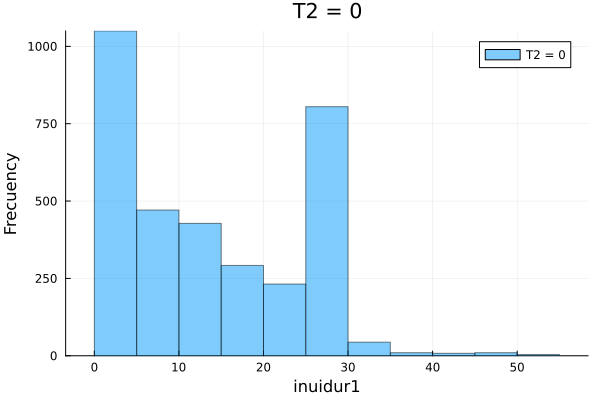

In [21]:
using DataFrames
using Plots
using StatsPlots

penn_t2_0 = filter(row -> row.T2 == 0, penn)
penn_t2_1 = filter(row -> row.T2 == 1, penn)

# Crear los histogramas
histogram(penn_t2_0.inuidur1, label="T2 = 0", alpha=0.5)

xlabel!("inuidur1")
ylabel!("Frecuency")
title!("T2 = 0")

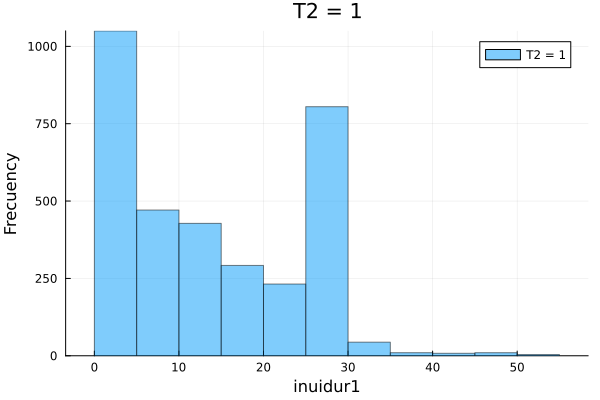

In [22]:
histogram(penn_t2_0.inuidur1, label="T2 = 1", alpha=0.5)

xlabel!("inuidur1")
ylabel!("Frecuency")
title!("T2 = 1")

In [7]:
    # couples variables combinations 
    combinations_upto(x, n) = Iterators.flatten(combinations(x, i) for i in 1:n)

    # combinations without same couple
    expand_exp(args, deg::ConstantTerm) =
        tuple(((&)(terms...) for terms in combinations_upto(args, deg.n))...)

    StatsModels.apply_schema(t::FunctionTerm{typeof(^)}, sch::StatsModels.Schema, ctx::Type) =
        apply_schema.(expand_exp(t.args_parsed...), Ref(sch), ctx)

In [8]:
reg1 = @formula(T2 ~ (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable)^2)
reg1 = apply_schema(reg1, schema(reg1, penn))

FormulaTerm
Response:
  T2(continuous)
Predictors:
  female(continuous)
  black(continuous)
  othrace(continuous)
  dep(DummyCoding:3→2)
  q2(continuous)
  q3(continuous)
  q4(continuous)
  q5(continuous)
  q6(continuous)
  agelt35(continuous)
  agegt54(continuous)
  durable(continuous)
  female(continuous) & black(continuous)
  female(continuous) & othrace(continuous)
  female(continuous) & dep(DummyCoding:3→2)
  female(continuous) & q2(continuous)
  female(continuous) & q3(continuous)
  female(continuous) & q4(continuous)
  female(continuous) & q5(continuous)
  female(continuous) & q6(continuous)
  female(continuous) & agelt35(continuous)
  female(continuous) & agegt54(continuous)
  female(continuous) & durable(continuous)
  black(continuous) & othrace(continuous)
  black(continuous) & dep(DummyCoding:3→2)
  black(continuous) & q2(continuous)
  black(continuous) & q3(continuous)
  black(continuous) & q4(continuous)
  black(continuous) & q5(continuous)
  black(continuous) & q6(continu

In [9]:
m1 = lm(reg1, penn)
table = regtable( "Covariate Balance Check" => m1) # coeficientes, standar error, squared R, N (sample size )

                   | Covariate Balance Check 
                   |           (1)           
---------------------------------------------
       (Intercept) |                0.500*** 
                   |                 (0.137) 
            female |                   0.024 
                   |                 (0.125) 
             black |                  -0.034 
                   |                 (0.084) 
           othrace |                   0.101 
                   |                 (0.289) 
          dep: 1.0 |                   0.141 
                   |                 (0.179) 
          dep: 2.0 |                  -0.189 
                   |                 (0.156) 
                q2 |                  -0.068 
                   |                 (0.140) 
                q3 |                  -0.081 
                   |                 (0.139) 
                q4 |                  -0.054 
                   |                 (0.140) 
                q5 |              

In [10]:
m1

StatsModels.TableRegressionModel{LinearModel{GLM.LmResp{Vector{Float64}}, GLM.DensePredChol{Float64, LinearAlgebra.CholeskyPivoted{Float64, Matrix{Float64}, Vector{Int64}}}}, Matrix{Float64}}

T2 ~ 1 + female + black + othrace + dep + q2 + q3 + q4 + q5 + q6 + agelt35 + agegt54 + durable + female & black + female & othrace + female & dep + female & q2 + female & q3 + female & q4 + female & q5 + female & q6 + female & agelt35 + female & agegt54 + female & durable + black & othrace + black & dep + black & q2 + black & q3 + black & q4 + black & q5 + black & q6 + black & agelt35 + black & agegt54 + black & durable + othrace & dep + othrace & q2 + othrace & q3 + othrace & q4 + othrace & q5 + othrace & q6 + othrace & agelt35 + othrace & agegt54 + othrace & durable + dep & q2 + dep & q3 + dep & q4 + dep & q5 + dep & q6 + dep & agelt35 + dep & agegt54 + dep & durable + q2 & q3 + q2 & q4 + q2 & q5 + q2 & q6 + q2 & agelt35 + q2 & agegt54 + q2 & durable + q3 & q4 + q3 & q5 + q3 & q6 + q3 & agelt35

In [31]:
function coefplot(m)
       n = coefnames(m)[2:end] # no intercept
       vals = coef(m)[2:end]
       errors = stderr(m)[2:end]
       scatter(
           n,
           vals,
           legend = false,
           yerror = 1.96 .* errors,
           title = "Coefficient plot"
       )
       end

coefplot (generic function with 1 method)

### Model specification

In [11]:
# No adjustment (2-sample approach)

ols_cl = lm(@formula(log(inuidur1) ~ T2), penn)

table1 = regtable( "No adjustment model" => ols_cl)   # 

            | No adjustment model 
            |         (1)         
----------------------------------
(Intercept) |            2.057*** 
            |             (0.021) 
         T2 |            -0.079** 
            |             (0.032) 
----------------------------------
          N |               5,782 
      $R^2$ |               0.001 


In [12]:
# adding controls
# Omitted dummies: q1, nondurable, muld

reg2 = @formula(log(inuidur1) ~ T2 + (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable)^2)
reg2 = apply_schema(reg2, schema(reg2, penn))

ols_cra = lm(reg2, penn)
table2 = regtable("CRA model" => ols_cra)

                   | CRA model 
                   |    (1)    
-------------------------------
       (Intercept) |  2.517*** 
                   |   (0.332) 
                T2 |  -0.075** 
                   |   (0.032) 
            female | -0.902*** 
                   |   (0.302) 
             black | -0.448*** 
                   |   (0.140) 
           othrace |    -0.260 
                   |   (1.069) 
          dep: 1.0 |     0.294 
                   |   (0.434) 
          dep: 2.0 |     0.233 
                   |   (0.377) 
                q2 |    -0.115 
                   |   (0.339) 
                q3 |    -0.466 
                   |   (0.338) 
                q4 |    -0.467 
                   |   (0.338) 
                q5 |    -0.380 
                   |   (0.337) 
                q6 |    -0.537 
                   |   (0.356) 
           agelt35 |    -0.303 
                   |   (0.313) 
           agegt54 |    -0.437 
                   |   (0.562) 
        

In [13]:
# demean function
function desv_mean(a)
    A = mean(a, dims = 1)
    M = zeros(Float64, size(X,1), size(X,2))
    
    for i in 1:size(a,2)
          M[:,i] = a[:,i] .- A[i]
    end
    return M
end    



# Matrix Model & demean
X = StatsModels.modelmatrix(reg1.rhs,penn)
X = desv_mean(X) # matrix format 

5782×90 Matrix{Float64}:
 -0.400726  -0.118817  -0.00518852  -0.116569  …  0.0  -0.073504  -0.0188516
 -0.400726  -0.118817  -0.00518852  -0.116569     0.0  -0.073504  -0.0188516
 -0.400726  -0.118817  -0.00518852  -0.116569     0.0  -0.073504  -0.0188516
 -0.400726  -0.118817  -0.00518852  -0.116569     0.0  -0.073504  -0.0188516
  0.599274  -0.118817  -0.00518852  -0.116569     0.0  -0.073504  -0.0188516
 -0.400726  -0.118817  -0.00518852   0.883431  …  0.0  -0.073504   0.981148
  0.599274  -0.118817  -0.00518852  -0.116569     0.0  -0.073504  -0.0188516
  0.599274  -0.118817  -0.00518852   0.883431     0.0  -0.073504  -0.0188516
  0.599274  -0.118817  -0.00518852   0.883431     0.0  -0.073504  -0.0188516
 -0.400726  -0.118817  -0.00518852  -0.116569     0.0  -0.073504  -0.0188516
  0.599274  -0.118817  -0.00518852  -0.116569  …  0.0  -0.073504  -0.0188516
  0.599274  -0.118817  -0.00518852  -0.116569     0.0  -0.073504  -0.0188516
  0.599274  -0.118817  -0.00518852  -0.116569     0.

In [14]:
Y = select(penn, [:inuidur1,:T2]) # select inuidur1 y T2

X = DataFrame(hcat(X, Matrix(select(penn, [:T2])).*X), :auto)  # Joint X, (T2*X)

base = hcat(Y, X) # Joint inuidur1, T2, X y (T2*X)

base.inuidur1 = log.(base.inuidur1)  # log(inuidur1)

terms = term.(names(base)) # term.() let us to get all variables as objects

#interactive regression model

ols_ira  = lm(terms[1] ~ sum(terms[2:end]), base)


table3 = regtable("Interactive model" => ols_ira)

#terms[1] : select first variable. In this case, oucome of interest 
#sum(terms[2:end]) : independent variables as regresors in the linear regression   
     

            | Interactive model 
            |        (1)        
--------------------------------
(Intercept) |          2.057*** 
            |           (0.021) 
         T2 |          -0.075** 
            |           (0.032) 
         x1 |            -0.604 
            |           (0.430) 
         x2 |         -0.794*** 
            |           (0.256) 
         x3 |            -1.482 
            |           (2.156) 
         x4 |            -0.005 
            |           (0.664) 
         x5 |             0.227 
            |           (0.475) 
         x6 |            -0.283 
            |           (0.474) 
         x7 |            -0.580 
            |           (0.473) 
         x8 |            -0.538 
            |           (0.474) 
         x9 |            -0.461 
            |           (0.472) 
        x10 |            -0.667 
            |           (0.493) 
        x11 |            -0.618 
            |           (0.418) 
        x12 |            -0.645 
          

In [15]:
X = StatsModels.modelmatrix(reg2.rhs,penn)
X = desv_mean(X)


D = DataFrame([X[:,1]], :auto)  # Treatment varaible

rename!(D, Dict(:x1 => :T2)) #rename x1 -> T2

X = DataFrame(hcat(X[:,2:end], X[:,1].*X[:,2:end]), :auto)  # Join Controls (X) + T2*X "interactive"

Y = select(penn, [:inuidur1]) #select just inuidur1

Y.inuidur1 = log.(Y.inuidur1)  # log(inuidur1)


5782-element Vector{Float64}:
 2.8903717578961645
 1.9459101490553132
 0.0
 3.295836866004329
 2.995732273553991
 3.295836866004329
 3.295836866004329
 2.1972245773362196
 3.295836866004329
 3.295836866004329
 2.70805020110221
 1.0986122886681098
 3.332204510175204
 ⋮
 2.302585092994046
 2.995732273553991
 3.295836866004329
 3.295836866004329
 2.70805020110221
 0.0
 3.1354942159291497
 1.791759469228055
 2.6390573296152584
 2.1972245773362196
 1.3862943611198906
 3.295836866004329

In [16]:
X

Row,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x17,x18,x19,x20,x21,x22,x23,x24,x25,x26,x27,x28,x29,x30,x31,x32,x33,x34,x35,x36,x37,x38,x39,x40,x41,x42,x43,x44,x45,x46,x47,x48,x49,x50,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60,x61,x62,x63,x64,x65,x66,x67,x68,x69,x70,x71,x72,x73,x74,x75,x76,x77,x78,x79,x80,x81,x82,x83,x84,x85,x86,x87,x88,x89,x90,x91,x92,x93,x94,x95,x96,x97,x98,x99,x100,⋯
,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,Float64,⋯
1,-0.400726,-0.118817,-0.00518852,-0.116569,0.839329,-0.200104,-0.235559,-0.223279,0.736769,-0.0652024,-0.540125,-0.106019,-0.149602,-0.0473884,-0.00294016,-0.0501557,-0.0511934,-0.0716015,-0.0861294,-0.102733,-0.112418,-0.0217918,-0.19751,-0.0475614,-0.0361467,0.0,-0.0143549,-0.0150467,-0.0211,-0.0299204,-0.0242131,-0.0352819,-0.00830163,-0.0686614,-0.00778277,-0.0119336,-0.000691802,-0.000864753,-0.000345901,-0.00121065,-0.000864753,-0.00207541,-0.000691802,-0.00242131,-0.000345901,-0.00121065,-0.0219647,-0.0359737,-0.0254237,-0.0380491,-0.0257696,-0.0321688,-0.034936,0.960567,-0.00674507,-0.0126254,-0.0518852,-0.0831892,-0.0207541,-0.00172951,-0.0212729,-0.0250778,0.0,0.0,0.0,0.0,-0.110169,-0.0188516,-0.0288827,0.0,0.0,0.0,-0.129367,-0.024559,-0.0344172,0.0,0.0,-0.117779,-0.0249049,-0.0283639,0.0,-0.141301,-0.0300934,-0.0441024,-0.0347631,-0.00657212,-0.0121065,0.0,-0.073504,-0.0188516,0.168275,0.0498941,0.00217878,0.04895,-0.352454,0.0840284,0.0989167,0.0937602,-0.309387,0.02738,⋯
2,-0.400726,-0.118817,-0.00518852,-0.116569,-0.160671,-0.200104,0.764441,-0.223279,-0.263231,-0.0652024,0.459875,-0.106019,-0.149602,-0.0473884,-0.00294016,-0.0501557,-0.0511934,-0.0716015,-0.0861294,-0.102733,-0.112418,-0.0217918,-0.19751,-0.0475614,-0.0361467,0.0,-0.0143549,-0.0150467,-0.0211,-0.0299204,-0.0242131,-0.0352819,-0.00830163,-0.0686614,-0.00778277,-0.0119336,-0.000691802,-0.000864753,-0.000345901,-0.00121065,-0.000864753,-0.00207541,-0.000691802,-0.00242131,-0.000345901,-0.00121065,-0.0219647,-0.0359737,-0.0254237,-0.0380491,-0.0257696,-0.0321688,-0.034936,-0.0394327,-0.00674507,-0.0126254,-0.0518852,-0.0831892,-0.0207541,-0.00172951,-0.0212729,-0.0250778,0.0,0.0,0.0,0.0,-0.110169,-0.0188516,-0.0288827,0.0,0.0,0.0,0.870633,-0.024559,-0.0344172,0.0,0.0,-0.117779,-0.0249049,-0.0283639,0.0,-0.141301,-0.0300934,-0.0441024,-0.0347631,-0.00657212,-0.0121065,0.0,-0.073504,-0.0188516,-0.232452,-0.0689229,-0.00300973,-0.0676187,-0.0932014,-0.116075,0.443434,-0.129519,-0.152694,-0.0378223,⋯
3,-0.400726,-0.118817,-0.00518852,-0.116569,-0.160671,-0.200104,-0.235559,-0.223279,0.736769,-0.0652024,-0.540125,-0.106019,-0.149602,-0.0473884,-0.00294016,-0.0501557,-0.0511934,-0.0716015,-0.0861294,-0.102733,-0.112418,-0.0217918,-0.19751,-0.0475614,-0.0361467,0.0,-0.0143549,-0.0150467,-0.0211,-0.0299204,-0.0242131,-0.0352819,-0.00830163,-0.0686614,-0.00778277,-0.0119336,-0.000691802,-0.000864753,-0.000345901,-0.00121065,-0.000864753,-0.00207541,-0.000691802,-0.00242131,-0.000345901,-0.00121065,-0.0219647,-0.0359737,-0.0254237,-0.0380491,-0.0257696,-0.0321688,-0.034936,-0.0394327,-0.00674507,-0.0126254,-0.0518852,-0.0831892,-0.0207541,-0.00172951,-0.0212729,-0.0250778,0.0,0.0,0.0,0.0,-0.110169,-0.0188516,-0.0288827,0.0,0.0,0.0,-0.129367,-0.024559,-0.0344172,0.0,0.0,-0.117779,-

In [17]:
names(X)

180-element Vector{String}:
 "x1"
 "x2"
 "x3"
 "x4"
 "x5"
 "x6"
 "x7"
 "x8"
 "x9"
 "x10"
 "x11"
 "x12"
 "x13"
 ⋮
 "x169"
 "x170"
 "x171"
 "x172"
 "x173"
 "x174"
 "x175"
 "x176"
 "x177"
 "x178"
 "x179"
 "x180"

In [18]:
include("C:/Users/Frank/.julia/packages/HDMjl/aG9BB/src/HDMjl.jl")

Main.HDMjl

# A Crash Course in Good and Bad Controls